  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

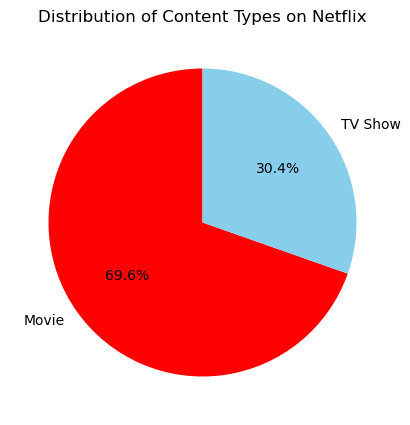

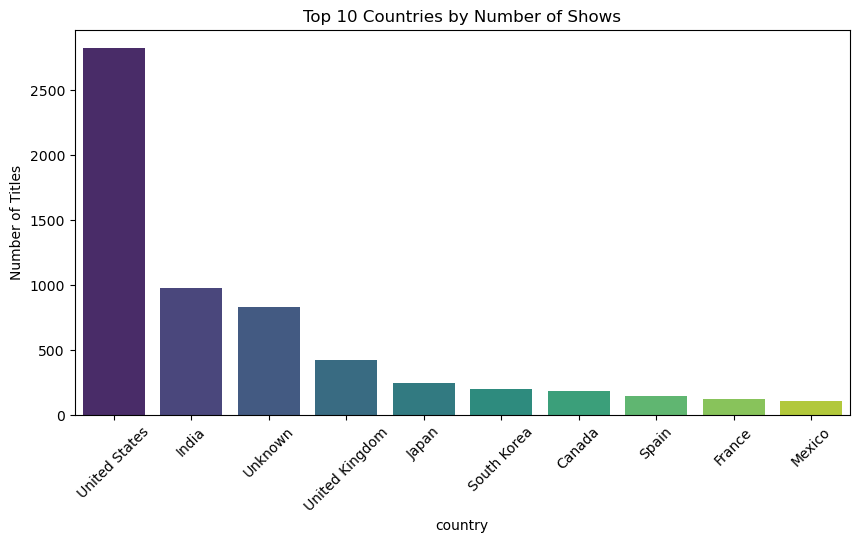

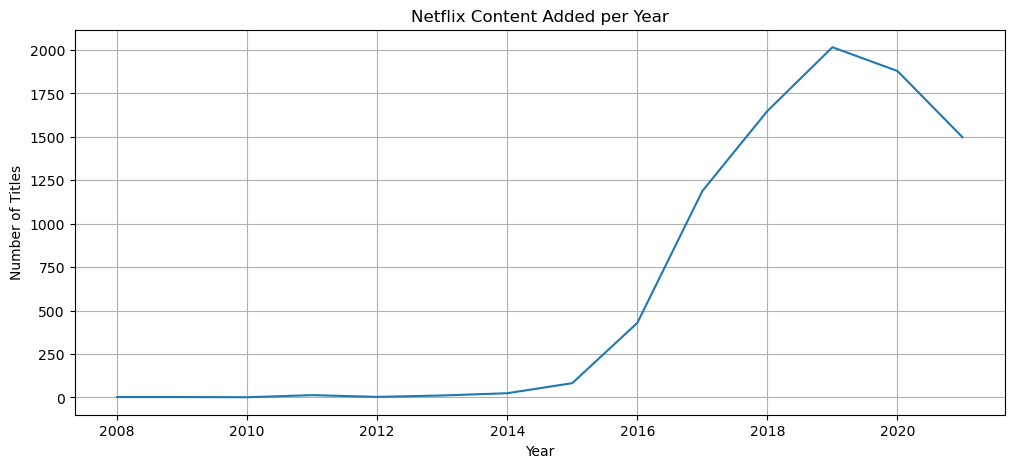

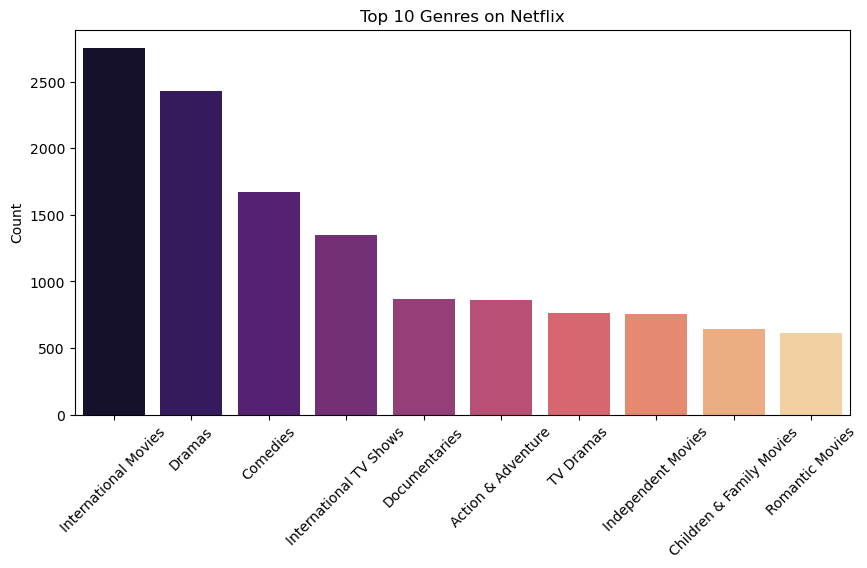

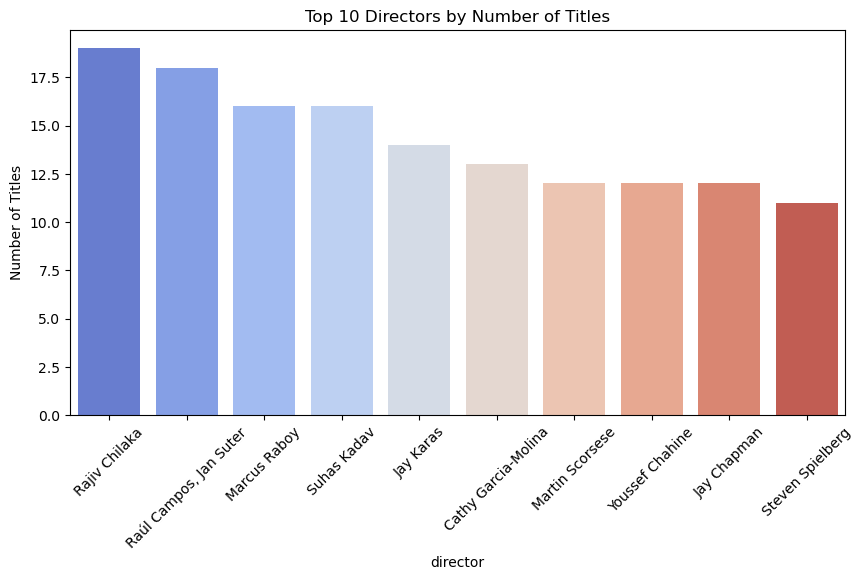

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\archive\netflix_titles.csv")
print(df.head())
print(df.info())
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

df.fillna({'country': 'Unknown', 'director': 'Unknown', 'cast': 'Unknown'}, inplace=True)

type_count = df['type'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=90, colors=['red', 'skyblue'])
plt.title("Distribution of Content Types on Netflix")
plt.show()

top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Number of Shows")
plt.ylabel("Number of Titles")
plt.show()

df['year_added'] = df['date_added'].dt.year
content_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values)
plt.title("Netflix Content Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

from collections import Counter

genre_series = df['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
genre_list = [genre for sublist in genre_series for genre in sublist]
top_genres = Counter(genre_list).most_common(10)

genres, counts = zip(*top_genres)
plt.figure(figsize=(10,5))
sns.barplot(x=list(genres), y=list(counts), hue=list(genres), palette='magma')
plt.xticks(rotation=45)
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.show()

top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.index, y=top_directors.values, hue=top_directors.index, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Directors by Number of Titles")
plt.ylabel("Number of Titles")
plt.show()
